#Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Test set Image Processing

In [5]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition /test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


##Loading Model

In [6]:
cnn=tf.keras.models.load_model('/content/trained_model.h5')

##Visualization and Performing Prediction on Single Image

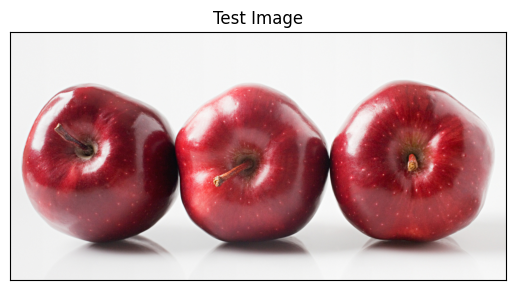

In [7]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Fruit_Vegetable_Recognition /test/apple/Image_3.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
# Convert single image to a batch.
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 416ms/step


In [9]:
print(predictions)

[[9.9998891e-01 2.1850696e-10 8.7034019e-11 1.4100002e-12 1.6826755e-13
  4.5972453e-12 6.7838009e-08 7.3606101e-13 2.0969066e-12 6.9134698e-12
  1.6237043e-13 4.8800872e-12 1.2667996e-09 1.8845114e-09 8.2653218e-11
  1.0713266e-11 1.9491466e-14 3.1771096e-11 4.3250332e-13 1.6537990e-11
  2.0229611e-06 2.1900632e-07 6.4487415e-10 2.4321215e-11 2.2347738e-12
  3.9475725e-11 8.1549133e-06 2.6622912e-08 3.0211885e-11 1.5709637e-11
  1.7227442e-16 3.5742135e-11 6.2798961e-07 3.1876324e-09 1.2600274e-10
  1.9705861e-09]]


In [10]:
result_index = np.argmax(predictions)
#Return index of max element
print(result_index)

0


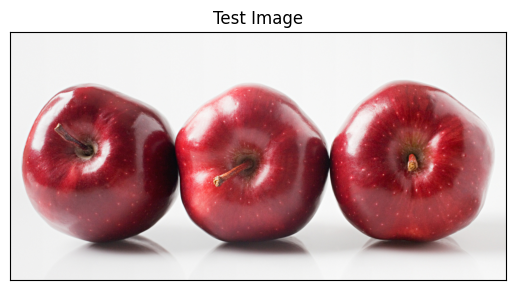

In [11]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a apple
